<a href="https://colab.research.google.com/github/AHernandez527/Tarea5InteligenciaArtificial_Hernandez_Jimenez/blob/main/TareaProgramada5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 5 Inteligencia Artificial 

Adriana Vanessa Hernández - Juan Pablo Jiménez


El objetivo de la red a diseñar es conseguir las mejores condiciones para crear un multiplexor 8 a 1 con compuertas AND, OR y NOT, bajo la premisa de optimizar desde tres puntos: El costo, el tiempo y la energía emitida. 

*  Coste: Dependerá de las entradas de los integrados, siendo los de 2 entradas de 1 unidad monetaria, los de 4 entradas con un costo de 2.5 unidades monetarias y los de 8 entradas con un coste de 6.25 entradas. 
*  Tiempo: Será el tiempo que traiga cada uno de los integrados en su hoja de datos. 
*  Energía emitida: será un valor tomado también de la hoja de datos del integrado. 






El Mux elaborado con compuertas lógicas se ve de la siguiente forma: 

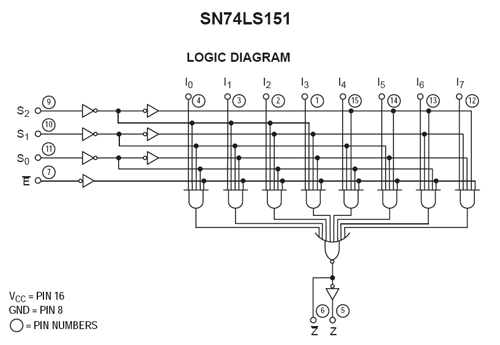

Como se puede ver, cada una de las señales de entrada pasa por un modulo AND de 5 patillas, que viajan a un NOR (OR + NOT) de 8 entradas. 
Estos modulos pueden elaborarse con una compuerta de 4 y una de 2 entradas, cuatro de 2 o una de 8 entradas directamente. 
Seguidamente hay una compuerta OR de 8 entradas, que puede verse como siete compuertas de 2 entradas, una compuerta de 4 entradas conectada a cuatro de 2 entradas, dos compuertas de 4 entradas y una de 2 entradas o directamente una OR de 8 entradas. 



La parte de la codificación se hará mediante la librería pymoo, además de la librería de manejo de datos Numpy.

In [2]:
!pip install pymoo==0.4.2.1
import numpy as np                        # Libreria para manejo de datos y operaciones matriciales
from pymoo.util.misc import stack
from pymoo.model.problem import Problem




     |████████████████████████████████| 3.7 MB 2.6 MB/s 
     |████████████████████████████████| 239 kB 59.0 MB/s 
  Created wheel for pymoo: filename=pymoo-0.4.2.1-cp37-cp37m-linux_x86_64.whl size=1347945 sha256=3e335e33bfbb66faf116d5bbec99ca5a2bd81ad6e3d7b6a82d5ac85044f57ca7
  Stored in directory: /root/.cache/pip/wheels/5a/fb/23/c08b050377517356ffde9389c0f4dae8ccec25e76344ee0b71
Successfully built pymoo


En este caso, se tiene como cromosoma el multiplexor, y sus genes son cada posible valor de entrada, ya sea para selección o para su entrada en sí y su salida. 
Es así como los alelos pueden variar entre categorías donde el gen de cada entrada varia entre tres topologías. Cada selector varía entre dos posibles topologías y la salida puede tener cuatro posibles combinaciones. 
En el caso de las funciones objetivo, no es necesario utilizar tres, puesto que la función de energía es identica a la de costo. Siendo así, se toma la función de costo como el aporte de cada compuerta al costo final del circuito (cantidad de entradas por compuerta por el costo de esta) y el tiempo como el tiempo de cada compuerta tomando en cuenta su tipo. 

In [3]:
#Limites para los alelos
al_min = 0
al_max = 1

class Problema1(Problem):
  def __init__ (self):
    super().__init__(n_var = 12, #Genes
                     n_obj = 2,  #Funciones Objetivo
                     xl = np.array([al_min,al_min,al_min,al_min,al_min,al_min,
                                    al_min,al_min,al_min,al_min,al_min,al_min]),
                     xu = np.array([al_max,al_max,al_max,al_max,al_max,al_max,
                                    al_max,al_max,al_max,al_max,al_max,al_max,]),
                     elementwise_evaluation=True)

  def _evaluate (self, x, out, *arg, **kwargs): #Funciones objetivo
    #Se les setea el valor inicial a las funciones en 0
    costo = 0
    energia = 0
    tiempo = 0

    #Costo por cantidad de entradas

    c2 = 1
    c4 = 2.5
    c8 = 6.25

    # Variables de energía 

    e2 = 1
    e4 = 2.5
    e8 = 6.25

    #Variables de tiempo

    AND2_t = 31
    AND4_t = 17
    AND8_t = 11

    OR2_t = 33
    OR4_t = 21
    OR8_t = 13

    NOT_t = 8

   #A continuación se sacan los costos, tiempos y energías para cada una de las 
   #topologías que se dijo se iban a tener para cada gen de entrada y salida

   #ENTRADA

    for i in range (7):
      if x [i] < 0.33:
        costo = costo + c2 + c4
        energia = energia + e2 + e4
        tiempo = tiempo + AND2_t + AND4_t
      elif x[i] < 0.66:
        costo = costo + 4*c2
        energia =  energia + 4*e2
        tiempo = tiempo + 4*AND2_t
      else: 
        costo = costo + c8
        energia = energia + e8
        tiempo = tiempo + AND8_t

    #SALIDA

    if x[8] < 0.25:
      costo = costo + 8*c2
      energia = energia + 8*e2 
      tiempo = tiempo + 8*OR2_t

    elif x[8] < 0.5:
      costo = costo + 4*c2 + c4
      energia = energia + 4*e2 + e4
      tiempo = tiempo + 4*OR2_t + OR4_t

    elif x[8] < 0.75:
      costo = costo + 2*c4 + c2
      energia = energia + 2*e4 + e2
      tiempo = tiempo + 2*OR4_t + OR2_t

    elif x[8] >= 0.75:
      costo = costo + c8
      energia = energia + e8
      tiempo = tiempo + OR8_t
      
#####
    
    for i in range (2):
      if x[8+i] < 0.5:
        costo = costo + c2
        energia = energia + e2
        tiempo = tiempo + NOT_t

      else: 
        costo = costo + 2*c2 
        energia = energia + 2*e2
        tiempo = tiempo + 2*NOT_t

      
      #Retorno de la función, costo y tiempo

      out["F"] = [costo, tiempo]


Lo siguiente es que hay que definir es el problema de optimización.

In [4]:
problema = Problema1()

Se importan también las librerías de pymoo y se define el algoritmo de Pareto.

In [5]:

# Se importan las librerias necesarias para pymoo
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

algorithm = NSGA2(pop_size = 50)


Usar una variable para guardar los parámetros

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |      50 |       8 |            - |            -
    2 |     100 |      18 |  0.114503817 |        ideal
    3 |     150 |      18 |  0.027293529 |            f
    4 |     200 |      12 |  0.064408464 |            f
    5 |     250 |      24 |  0.006189382 |            f
    6 |     300 |      47 |  0.00000E+00 |            f
    7 |     350 |      50 |  0.00000E+00 |            f
    8 |     400 |      50 |  0.00000E+00 |            f
    9 |     450 |      50 |  0.00000E+00 |            f
   10 |     500 |      50 |  0.00000E+00 |            f
   11 |     550 |      50 |  0.034482759 |        ideal
   12 |     600 |      50 |  0.00000E+00 |            f
   13 |     650 |      50 |  0.00000E+00 |            f
   14 |     700 |      50 |  0.00000E+00 |            f
   15 |     750 |      50 |  0.00000E+00 |            f
   16 |     800 |      50 |  0.00000E+00 |            f
   17 |     850 |      50 |  0.00000E+00 |      

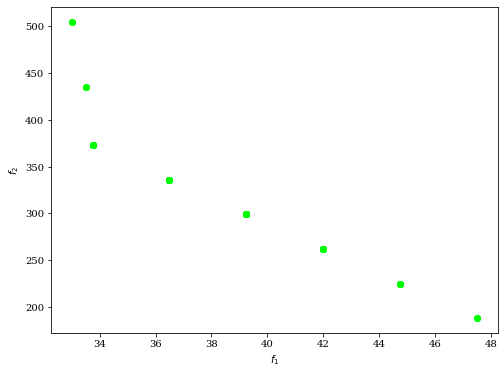

In [6]:
res = minimize(problema,         # Variable tipo Problema1
               algorithm,       # Algoritmo
               ("n_gen", 100),  # Numero de generaciones
               verbose=True,
               seed=1)

# Graficacion de Pareto
plot = Scatter()
plot.add(res.F, color="lime")
plot.show()

In [7]:
from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt


n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |      11 |            - |            -
    2 |     210 |      11 |  0.00000E+00 |            f
    3 |     220 |      11 |  0.00000E+00 |            f
    4 |     230 |      11 |  0.00000E+00 |            f
    5 |     240 |      11 |  0.00000E+00 |            f
    6 |     250 |      11 |  0.00000E+00 |            f
    7 |     260 |      11 |  0.00000E+00 |            f
    8 |     270 |      11 |  0.00000E+00 |            f
    9 |     280 |      11 |  0.00000E+00 |            f
   10 |     290 |      11 |  0.00000E+00 |            f
   11 |     300 |      12 |  0.00000E+00 |            f
   12 |     310 |      13 |  0.00000E+00 |            f
   13 |     320 |      14 |  0.00000E+00 |            f
   14 |     330 |      16 |  0.00000E+00 |            f
   15 |     340 |      17 |  0.00000E+00 |            f
   16 |     350 |      20 |  0.00000E+00 |            f
   17 |     360 |      20 |  0.00000E+00 |      

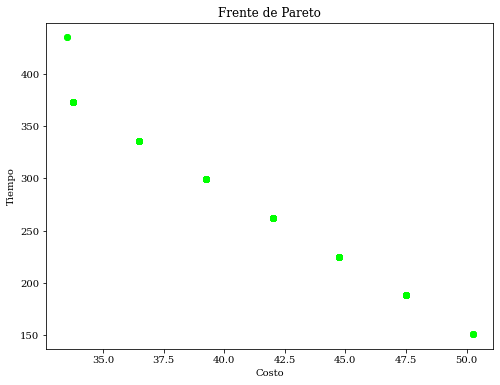

In [17]:
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_selection

# Tipo de algoritmo de Pareto
algorithm = NSGA2(
    pop_size= 200, #100 200                
    selection = get_selection('random'), 
    n_offsprings=10,         
    # Tipo de muestras             
    sampling=get_sampling("real_lhs"), 
    # Tipo de entrecruzamiento
    crossover=get_crossover("real_one_point"), 
    # Tipo de mutacion y porcentaje
    mutation=get_mutation("real_pm", eta=100),
    eliminate_duplicates=True
)

from pymoo.factory import get_termination
# Se define la condicion de paro
termination = get_termination("n_gen", 300)

# Se compila los parametros y se guarda los resultados
res = minimize(problema,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

# Segrafica el frente de Pareto
plot = Scatter(labels=['Costo','Tiempo'], title=['Frente de Pareto'])
plot.add(res.F, color="lime")
plot.show()

Ahora se necesita obtener cuál fue la topología seleccionada como mejor con los parámetros utilizados, siendo asi de "codifican" los valores obtenidos en los genes para los 

In [19]:
# Resultados
obj = res

Gen = []

F = obj.opt.get('F')      # Se obtinenen los valores objetivos
opt = []

# En este se optiene el punto medio del frente de pareto

for i in range(len(F)):
  opt.append(F[i][0]/(F.max(axis=0)[0]-F.min(axis=0)[0])+F[i][1]/(F.max(axis=0)[1]-F.min(axis=0)[1]))
m = opt.index(min(opt))

op = F[m]

x = obj.opt.get('X')[i]     # Se obtienen los valores 

# Se codifican las topologia que forman los genes
for i in range(8):
    if x[i] < 0.33:
      Gen.append('Topologia E1')
    elif x[i] < 0.66:
      Gen.append('Topologia E2')
    else:
      Gen.append('Topologia E3')

if x[9] < 0.25:
  Gen.append('Topologia S1')
elif x[8] < 0.5:
  Gen.append('Topologia S2')
elif x[8] < 0.75:
  Gen.append('Topologia S3')
elif x[8] >= 0.75:
  Gen.append('Topologia S4')

for i in range(3):
  if x[9+i] < 0.5:
    Gen.append('Topologia Sel1')
  else:
    Gen.append('Topologia Sel2')

# Se imprimen los valores obtenidos
print(f"Generacion: {len(obj.opt)} Optimo: Coste {op[0]}, Tiempo {op[1]}")
print(f"Genes {Gen}")

Generacion: 200 Optimo: Coste 33.75, Tiempo 373.0
Genes ['Topologia E3', 'Topologia E1', 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia S1', 'Topologia Sel1', 'Topologia Sel1', 'Topologia Sel2']


Como se puede ver, se toman las las entradas (los and de 5 entradas) como E1 para la topología de una AND de 4 entradas y una de 2. La E2 sería una topología de entrada con cuatro AND de 2 entradas y como topología E3 a la AND de 8 entradas. 
Para la salida, S1 corresponderá a las siete OR de 2 entradas, S2 corresponde a una OR de 4 entradas y cuatro OR de 2, S3 corresponde a dos OR de 4 entradas y una de 2 entradas y S4 sería una OR de 8 entradas. 
Finalmente en los selectores se utiliza Sel1 para una única compuerta NOT y Sel2 para el caso de dos compuertas NOT.


A continuación diferentes resultados obtenidos según variacón de los parámetros de pop size, selection, sampling, cossover y mutation:


Optimo:
* Coste 33.75
* Tiempo 373.0
* Genes 'Topologia E3', 'Topologia E1', 'Topologia E3', 'Topologia E3', 'Topologia E1', 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia S4', 'Topologia Sel1', 'Topologia Sel2', 'Topologia Sel2'
*  Valores Utilizados: 
  *  Pop Size: 10
  * Selection: random
  * Sampling: real hs
  * Crossover: real two points
  * Mutation: real pm - eta=20
  * Generaciones: 100

  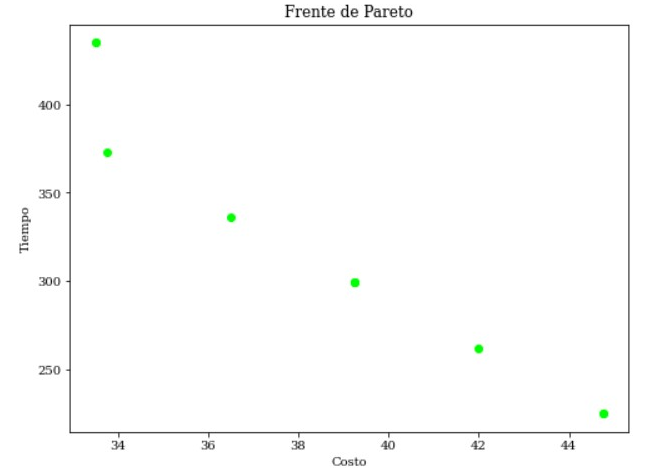


Optimo:
* Coste 39.25
* Tiempo 299.0
* Genes 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia E2', 'Topologia E1', 'Topologia E1', 'Topologia E1', 'Topologia E2', 'Topologia S1', 'Topologia Sel1', 'Topologia Sel2', 'Topologia Sel2'
*  Valores Utilizados: 
  *  Pop Size: 100
  * Selection: random
  * Sampling: real_random
  * Crossover: real_sbx
  * Mutation: real pm - eta=10
  * Generaciones: 10

  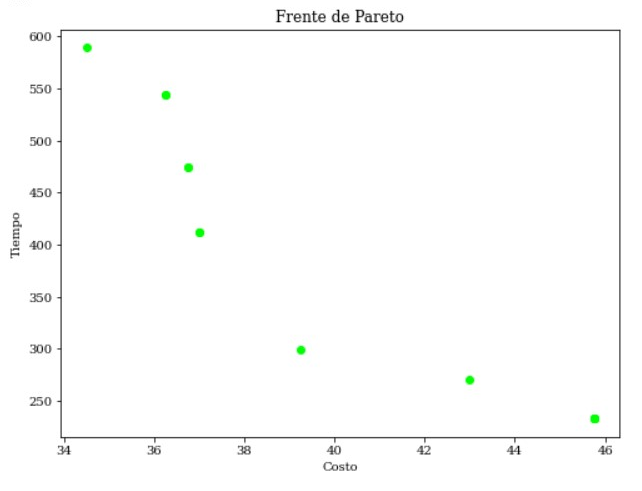

 

Optimo:
* Coste 33.75
* Tiempo 373.0
* Genes 'Topologia E3', 'Topologia E1', 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia E1', 'Topologia E3', 'Topologia E1', 'Topologia S1', 'Topologia Sel1', 'Topologia Sel1', 'Topologia Sel2'
*  Valores Utilizados: 
  *  Pop Size: 200
  * Selection: random
  * Sampling: real_lhs
  * Crossover: real_one_point
  * Mutation: real pm - eta=100
  * Generaciones: 300

  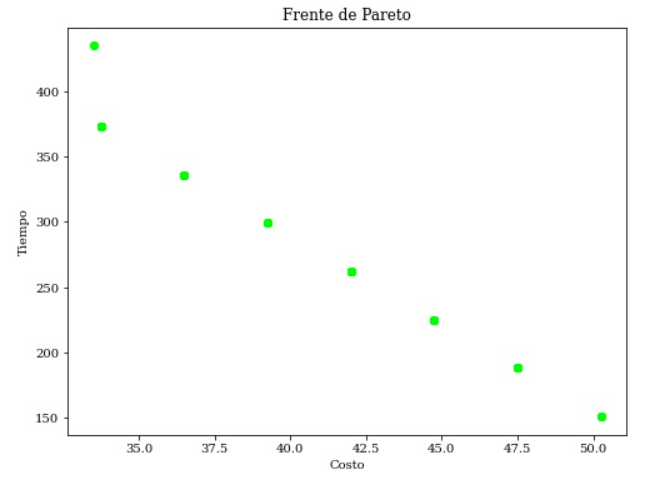
